In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from reframed import load_cbmodel

## pFBA simulations

In [3]:
df = pd.read_csv('../results/main_results.tsv', sep='\t', na_values='None')
df = df.query('test == "LP2"')

In [4]:
models = {x: load_cbmodel(f'../models/{x}.xml.gz', flavor='bigg') for x in set(df['model'])}
lp_sizes = {x: len(models[x].reactions) for x in models}
milp_sizes = {x: len(models[x].get_exchange_reactions()) for x in models}

In [5]:
df['size_lp'] = df['model'].apply(lambda x: lp_sizes[x])

In [7]:
solver_name = {
    'CPLEX_PY': 'cplex',
    'GUROBI': 'gurobi',
    'SCIP_CMD': 'scip',
    'HiGHS_CMD': 'highs',
    'GLPK_CMD': 'glpk',
    'COIN_CMD': 'coin',

}
df['solver'] = df['interface'].apply(lambda x: solver_name[x])

In [26]:
df2 = pd.read_csv('../results/community_simulation.tsv', sep='\t')
df2 = df2.query('test == "LP2" and time < 3600')
df2['solver'] = df2['interface'].apply(lambda x: solver_name[x])

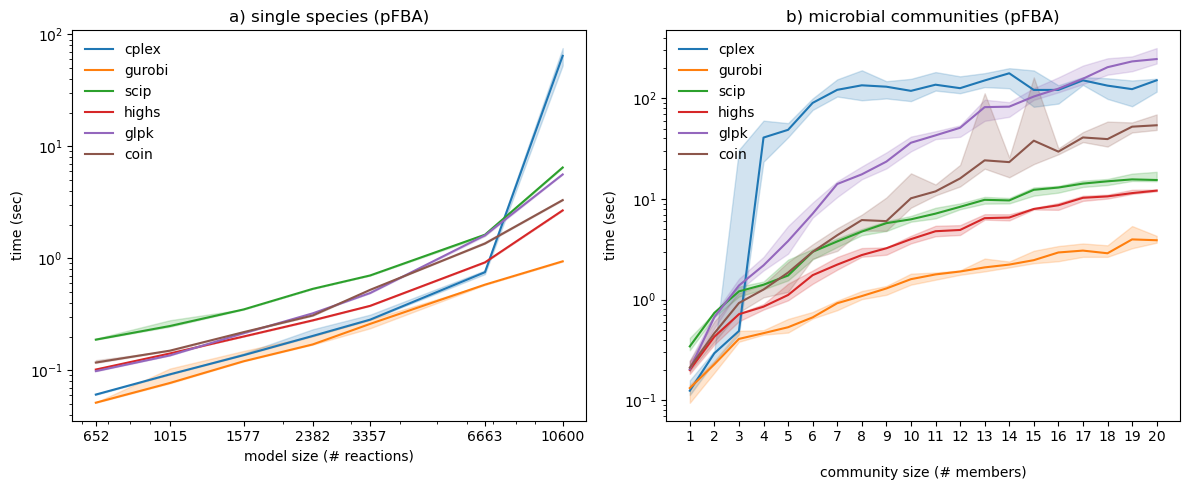

In [27]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.lineplot(data=df, x="size_lp", y="time", hue="solver",  ax=ax1, estimator="median", errorbar=("pi", 50))

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xticks(list(lp_sizes.values()))
ax1.set_xticklabels(list(lp_sizes.values()))
ax1.set_xlabel('model size (# reactions)')
ax1.set_ylabel('time (sec)')
ax1.legend(loc=2, frameon=False)
ax1.set_title('a) single species (pFBA)')

sns.lineplot(data=df2, x="size", y="time", hue="solver", ax=ax2, estimator="median", errorbar=("pi", 50))

ax2.set_yscale('log')
ax2.set_xticks(range(1,21))
ax2.set_xlabel('\ncommunity size (# members)')
ax2.set_ylabel('time (sec)')
ax2.legend(loc=2, frameon=False)
ax2.set_title('b) microbial communities (pFBA)')

f.tight_layout()
f.savefig('../figures/pfba.tiff', dpi=300)

## Memory tests

In [20]:
df3 = pd.read_csv('../results/memory_test.tsv', sep='\t')
df3['solver'] = df3['interface'].apply(lambda x: solver_name[x])


In [21]:
df3a = df3.query('test == "LP"').copy()
df3a['size_lp'] = df3a['model'].apply(lambda x: lp_sizes[x])


In [24]:
df3b = df3.query('test == "MILP"').copy()
df3b['size_milp'] = df3b['model'].apply(lambda x: milp_sizes[x])

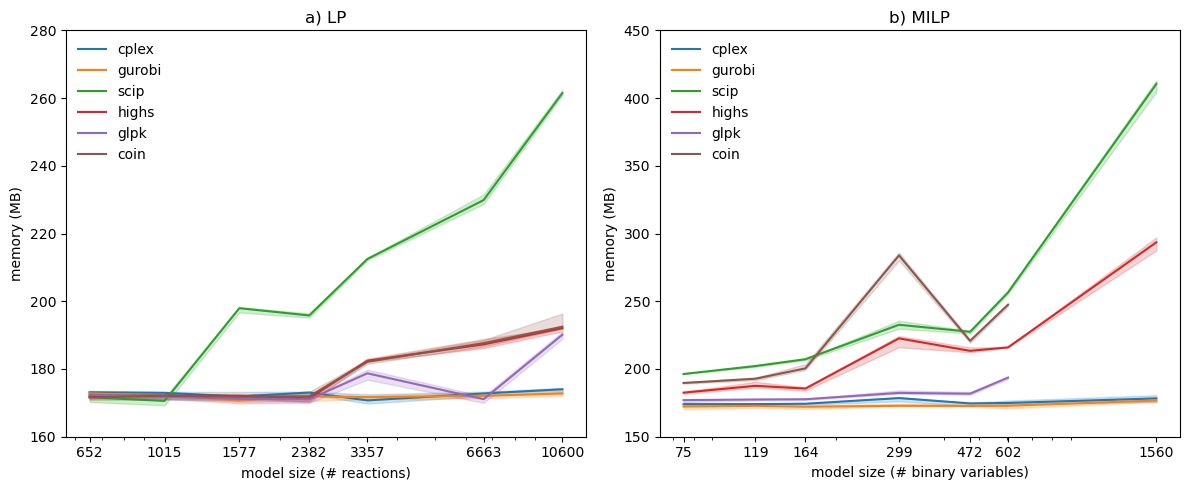

In [61]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=False)

sns.lineplot(data=df3a, x="size_lp", y="mem", hue="solver",  ax=ax1, estimator="median", errorbar=("pi", 50))

ax1.set_xscale('log')
ax1.set_ylim((160, 280))
ax1.set_xticks(list(lp_sizes.values()))
ax1.set_xticklabels(list(lp_sizes.values()))
ax1.set_xlabel('model size (# reactions)')
ax1.set_ylabel('memory (MB)')
ax1.legend(loc=2, frameon=False)
ax1.set_title('a) LP')


sns.lineplot(data=df3b, x="size_milp", y="mem", hue="solver",  ax=ax2, estimator="median", errorbar=("pi", 50))

ax2.set_xscale('log')
ax2.set_ylim((150, 450))
ax2.set_xticks(list(milp_sizes.values()))
ax2.set_xticklabels(list(milp_sizes.values()))
ax2.set_xlabel('model size (# binary variables)')
ax2.set_ylabel('memory (MB)')
ax2.legend(loc=2, frameon=False)
ax2.set_title('b) MILP')

f.tight_layout()
f.savefig('../figures/memory.tiff', dpi=300)